# Exploratory Data Analysis of Different Movies and TV Shows in Netflix

## Import necessary libraries

In [1]:
!pip install missingno

In [2]:
import pandas as pd     # for tabular data reading and analysis
import numpy as np      # for numerical computations
import seaborn as sns   # data visualization
import matplotlib.pyplot as plt # for data visualization
import missingno        # for missing value treatment  (!pip install missingno)

## Read the data

In [3]:
data = pd.read_csv("./netflix_titles.csv")

In [4]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Basic information about the data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


The data has 8807 rows and 12 columns

## Find the missing values in the data

In [7]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

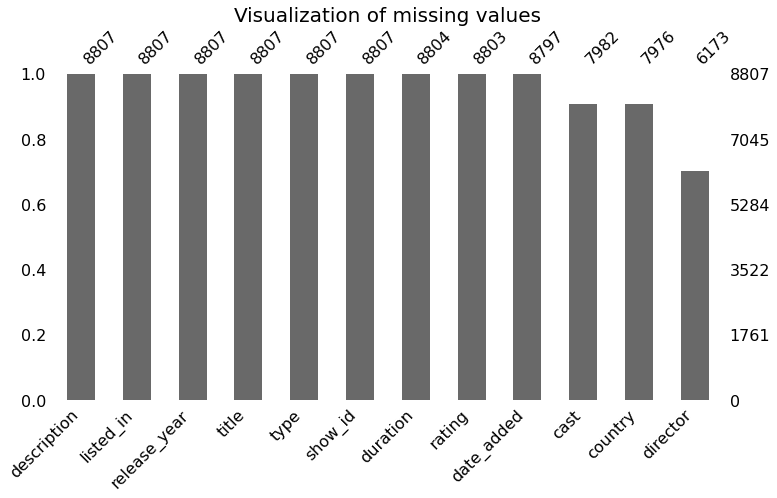

In [8]:
missingno.bar(data, fontsize=16, sort='descending', figsize=(12,6))
plt.title("Visualization of missing values", fontsize=20)
plt.show()

Most of the values are missing in the `director` column and some of in the `cast`, `country` and `date_added` column.

## Check for duplicates

In [12]:
data.duplicated().sum()

0

There is no duplicate values

## Treating the date added column

In [13]:
data['date_added']

0       September 25, 2021
1       September 24, 2021
2       September 24, 2021
3       September 24, 2021
4       September 24, 2021
               ...        
8802     November 20, 2019
8803          July 1, 2019
8804      November 1, 2019
8805      January 11, 2020
8806         March 2, 2019
Name: date_added, Length: 8807, dtype: object

 We want the `date_added`column in date-time format

In [14]:
pd.DatetimeIndex(data['date_added'])

DatetimeIndex(['2021-09-25', '2021-09-24', '2021-09-24', '2021-09-24',
               '2021-09-24', '2021-09-24', '2021-09-24', '2021-09-24',
               '2021-09-24', '2021-09-24',
               ...
               '2018-09-13', '2019-12-31', '2018-02-15', '2016-12-15',
               '2016-03-09', '2019-11-20', '2019-07-01', '2019-11-01',
               '2020-01-11', '2019-03-02'],
              dtype='datetime64[ns]', name='date_added', length=8807, freq=None)

In [19]:
data['date_added'] = pd.DatetimeIndex(data['date_added'])

data['year'] = pd.DatetimeIndex(data['date_added']).year

data['month'] = pd.DatetimeIndex(data['date_added']).month

In [20]:
data[['date_added', 'year', 'month']]

,date_added,year,month
0,2021-09-25,2021.0,9.0
1,2021-09-24,2021.0,9.0
2,2021-09-24,2021.0,9.0
3,2021-09-24,2021.0,9.0
4,2021-09-24,2021.0,9.0
...,...,...,...
8802,2019-11-20,2019.0,11.0
8803,2019-07-01,2019.0,7.0
8804,2019-11-01,2019.0,11.0
8805,2020-01-11,2020.0,1.0


In [21]:
data.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
year                   float64
month                  float64
dtype: object

## Rating column

In [22]:
data['rating']

0       PG-13
1       TV-MA
2       TV-MA
3       TV-MA
4       TV-MA
        ...  
8802        R
8803    TV-Y7
8804        R
8805       PG
8806    TV-14
Name: rating, Length: 8807, dtype: object

How many unique types of rating do we have?

In [23]:
data['rating'].nunique()

17

In [24]:
data['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [30]:
data[data['rating']=='66 min']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...,2016.0,8.0


In [31]:
data[data['rating']=='74 min']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",2017.0,4.0


In [50]:
data[data['rating']=='84 min']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,2016.0,9.0


In [51]:
data['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [58]:
idx = data[data['rating'].isna()].index

In [62]:
data.loc[idx, 'rating'] = "NA"

In [65]:
idx = data[data['rating'].str.contains('min')].index

In [66]:
idx

Int64Index([5541, 5794, 5813], dtype='int64')

In [67]:
data.loc[idx, 'duration'] = data.loc[idx, 'rating']

In [68]:
data.loc[idx, 'rating'] = 'NA'

In [73]:
data['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
NA             7
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

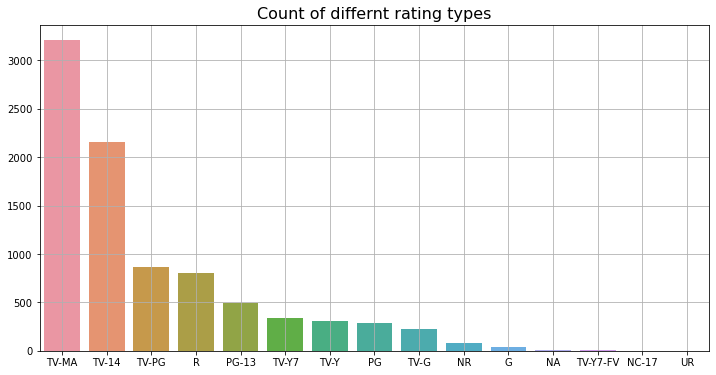

In [76]:
plt.figure(figsize=(12,6))
sns.barplot(x = data['rating'].value_counts().index, y = data['rating'].value_counts().values)
plt.grid()
plt.title("Count of differnt rating types", fontsize=16)
plt.show()

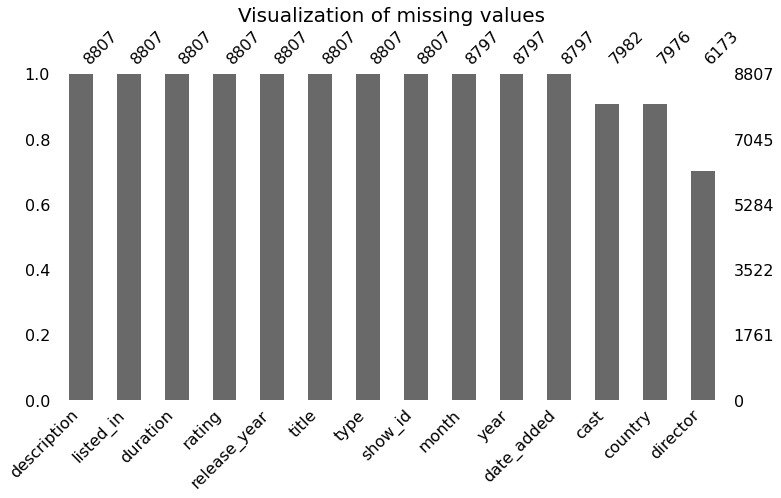

In [70]:
missingno.bar(data, fontsize=16, sort='descending', figsize=(12,6))
plt.title("Visualization of missing values", fontsize=20)
plt.show()

## Content distribution

In [78]:
data['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [79]:
x = data['type'].value_counts()

In [80]:
x

Movie      6131
TV Show    2676
Name: type, dtype: int64

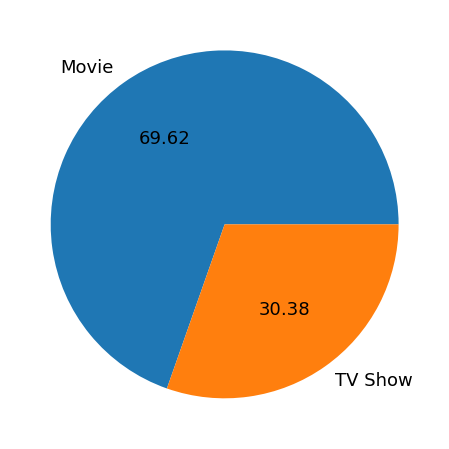

In [95]:
plt.figure(figsize=(8,8))
wedges, titles, perc = plt.pie(x, normalize=True, labels=data['type'].unique(), autopct='%0.2f')
for t in titles:
    t.set_fontsize("18")
for p in perc:
    p.set_fontsize("18")
plt.show()

## Countries

In [96]:
data['country']

0       United States
1        South Africa
2                 NaN
3                 NaN
4               India
            ...      
8802    United States
8803              NaN
8804    United States
8805    United States
8806            India
Name: country, Length: 8807, dtype: object

In [97]:
data['country'].value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [98]:
data['country'].nunique()

748

In [104]:
top_10_country = data['country'].value_counts()[:10]

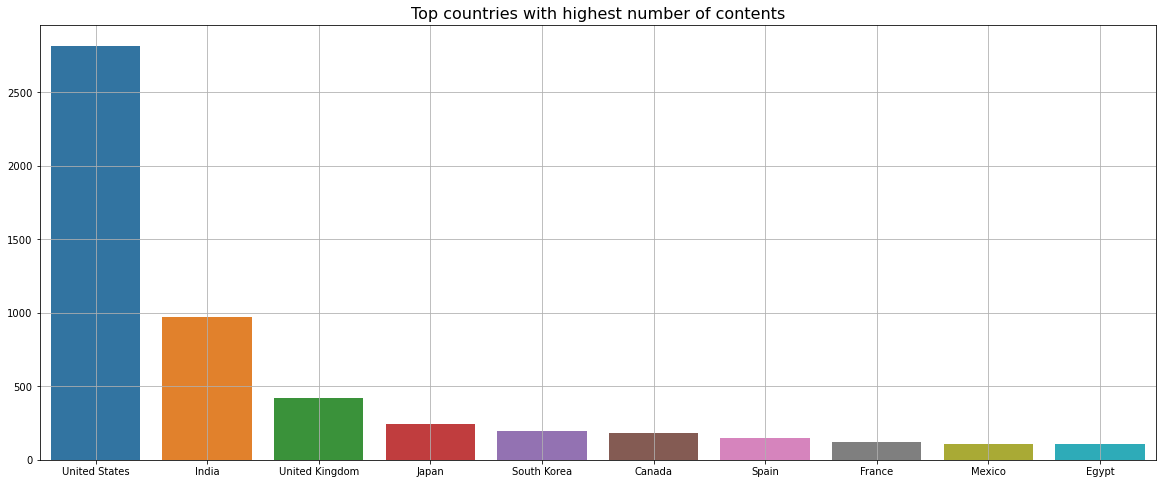

In [105]:
plt.figure(figsize=(20,8))
sns.barplot(x = top_10_country.index, y = top_10_country.values)
plt.grid()
plt.title("Top countries with highest number of contents", fontsize=16)
plt.show()

## Content added over years

C:\Users\SouravKarmakar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


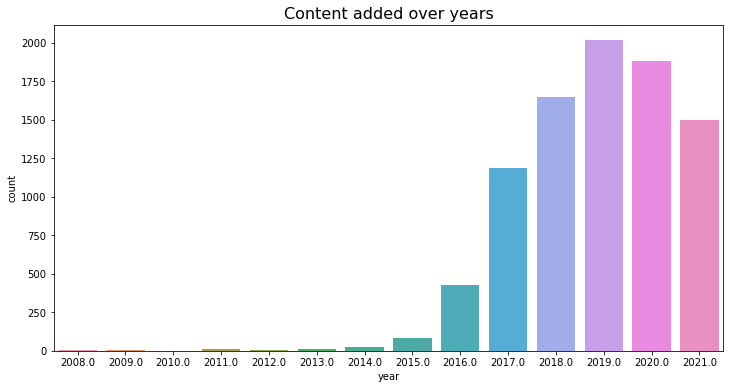

In [107]:
plt.figure(figsize=(12,6))
sns.countplot(data['year'])
plt.title("Content added over years", fontsize=16)
plt.show()

In [108]:
movies_data = data[data['type']=="Movie"]
tv_shows_data = data[data['type']=='TV Show']

C:\Users\SouravKarmakar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


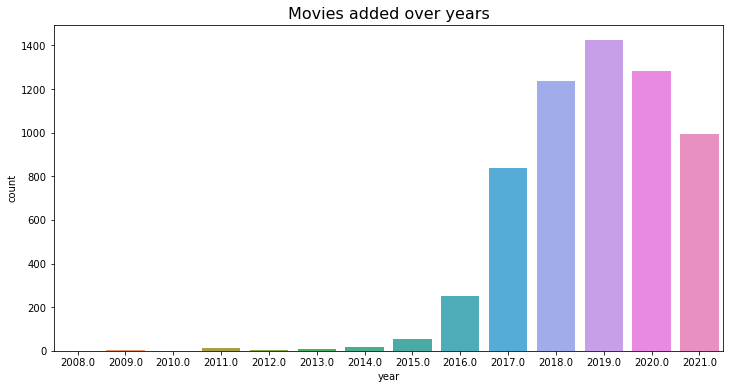

In [109]:
plt.figure(figsize=(12,6))
sns.countplot(movies_data['year'])
plt.title("Movies added over years", fontsize=16)
plt.show()

C:\Users\SouravKarmakar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


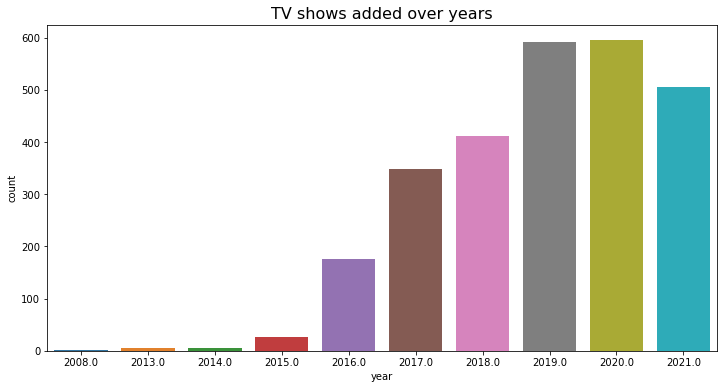

In [110]:
plt.figure(figsize=(12,6))
sns.countplot(tv_shows_data['year'])
plt.title("TV shows added over years", fontsize=16)
plt.show()

In [111]:
data['director'].nunique()

4528

In [112]:
data['director'].value_counts()

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64

In [114]:
tv_shows_data['duration'].value_counts()

1 Season      1793
2 Seasons      425
3 Seasons      199
4 Seasons       95
5 Seasons       65
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       7
13 Seasons       3
15 Seasons       2
12 Seasons       2
11 Seasons       2
17 Seasons       1
Name: duration, dtype: int64

In [118]:
tv_shows_data[tv_shows_data['duration'] == '10 Seasons']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month
390,s391,TV Show,The Walking Dead,NaN,"Andrew Lincoln, Steven Yeun, Norman Reedus, Ch...",United States,2021-07-26,2019,TV-MA,10 Seasons,"Classic & Cult TV, TV Action & Adventure, TV D...","In the wake of a zombie apocalypse, survivors ...",2021.0,7.0
1622,s1623,TV Show,Stargate SG-1,NaN,"Richard Dean Anderson, Michael Shanks, Amanda ...","United States, Canada",2020-12-01,2006,TV-MA,10 Seasons,"Classic & Cult TV, TV Action & Adventure, TV S...",Stargate Command roars into action when Jack O...,2020.0,12.0
1759,s1760,TV Show,LEGO Ninjago: Masters of Spinjitzu,NaN,"Vincent Tong, Jillian Michaels, Ian James Corl...","Denmark, Singapore, Canada, United States",2020-11-01,2019,TV-Y7,10 Seasons,Kids' TV,"Kai, Jay, Cole and Zane must master their elem...",2020.0,11.0
2203,s2204,TV Show,Shameless (U.S.),NaN,"William H. Macy, Emmy Rossum, Justin Chatwin, ...",United States,2020-07-26,2019,TV-MA,10 Seasons,"TV Comedies, TV Dramas",This dramedy based on a British series centers...,2020.0,7.0
5908,s5909,TV Show,Danger Mouse: Classic Collection,NaN,"David Jason, Terry Scott, Edward Kelsey, Brian...",United Kingdom,2015-06-15,1992,TV-Y,10 Seasons,"British TV Shows, Kids' TV, TV Comedies",Follow the adventures of superspy Danger Mouse...,2015.0,6.0
6549,s6550,TV Show,Dad's Army,NaN,"Arthur Lowe, John Le Mesurier, Clive Dunn, Joh...",United Kingdom,2018-03-31,1977,TV-PG,10 Seasons,"British TV Shows, Classic & Cult TV, TV Comedies",This beloved sitcom follows the unlikely heroe...,2018.0,3.0
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...,NaN,NaN


In [121]:
data[['director','country']].groupby(by='country').count().sort_values('director',ascending=False)

,director
country,
United States,2048
India,890
United Kingdom,212
Canada,119
Spain,106
...,...
"United States, Colombia, Mexico",0
"United States, Colombia",0
"Ireland, United States, United Kingdom",0
